In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Step 1: Load both CSV files
kaggle_dataset = pd.read_csv('Dataset/kaggleDataset.csv', infer_datetime_format=True, parse_dates=["date"])
polito_dataset = pd.read_csv('Dataset/politoDataset.csv', infer_datetime_format=True, parse_dates=["date"])

C:\Users\taha_kms\AppData\Local\Temp\ipykernel_6840\1693559249.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  kaggle_dataset = pd.read_csv('Dataset/kaggleDataset.csv', infer_datetime_format=True, parse_dates=["date"])
C:\Users\taha_kms\AppData\Local\Temp\ipykernel_6840\1693559249.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  kaggle_dataset = pd.read_csv('Dataset/kaggleDataset.csv', infer_datetime_format=True, parse_dates=["date"])
C:\Users\taha_kms\AppData\Local\Temp\ipykernel_6840\1693559249.py:3: FutureWarning: Th

In [9]:
# Step 2: Replace id == 4 with 1 in df1
kaggle_dataset['sentiment'] = kaggle_dataset['sentiment'].replace(4, 1)

In [10]:
kaggle_dataset.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
polito_dataset.rename(columns={'sent_lable': 'sentiment'}, inplace=True)
kaggle_dataset.rename(columns={'tweet': 'text'}, inplace=True)

In [12]:
kaggle_dataset.columns, polito_dataset.columns

(Index(['sentiment', 'ids', 'date', 'flag', 'user', 'text'], dtype='object'),
 Index(['sentiment', 'ids', 'date', 'flag', 'user', 'text'], dtype='object'))

In [13]:

# Step 3: Concatenate the two DataFrames
merged_df = pd.concat([polito_dataset, kaggle_dataset], ignore_index=True)

# Step 4: Save the result to a new CSV
merged_df.to_csv("Dataset/merged_output.csv", index=False)

### 1. Data Exploration


In [14]:
merged_df['sentiment'].unique(), merged_df.shape

(array([1, 0], dtype=int64), (1779995, 6))

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779995 entries, 0 to 1779994
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   sentiment  int64         
 1   ids        int64         
 2   date       datetime64[ns]
 3   flag       object        
 4   user       object        
 5   text       object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 81.5+ MB


In [16]:
# creation column of hour, weekday, month from date
merged_df["hour"] = merged_df["date"].apply(lambda x: x.hour)
merged_df["weekday"] = merged_df["date"].apply(lambda x: x.weekday())
merged_df["month"] = merged_df["date"].apply(lambda x: x.month)
merged_df["day"] = merged_df["date"].apply(lambda x: x.day)


merged_df.head()

,sentiment,ids,date,flag,user,text,hour,weekday,month,day
0,1,1995592655,2009-06-01 13:44:19,NO_QUERY,carlincomm,@krclaypool Sure I'd be glad to! http://bit.l...,13,0,6,1
1,0,1992268865,2009-06-01 08:28:41,NO_QUERY,FootyGirl88,"I still can't find my phone, I NEED that phone...",8,0,6,1
2,1,2047074239,2009-06-05 13:06:42,NO_QUERY,fryfan20,"Have taken a shower, didn't calm but did clean...",13,4,6,5
3,1,1976075552,2009-05-30 16:31:55,NO_QUERY,luvinmesomed,@JKDW4ever OMG!! those were great!!! I freakin...,16,5,5,30
4,0,1981978321,2009-05-31 10:16:44,NO_QUERY,babybunny1987,@EvoOba noooo chinese foot it was closed.but ...,10,6,5,31


C:\Users\taha_kms\AppData\Local\Temp\ipykernel_6840\493352662.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(["void", "Mon", "Tue", "Wen", "Thu", "Fri", "Sat", "Sun"])


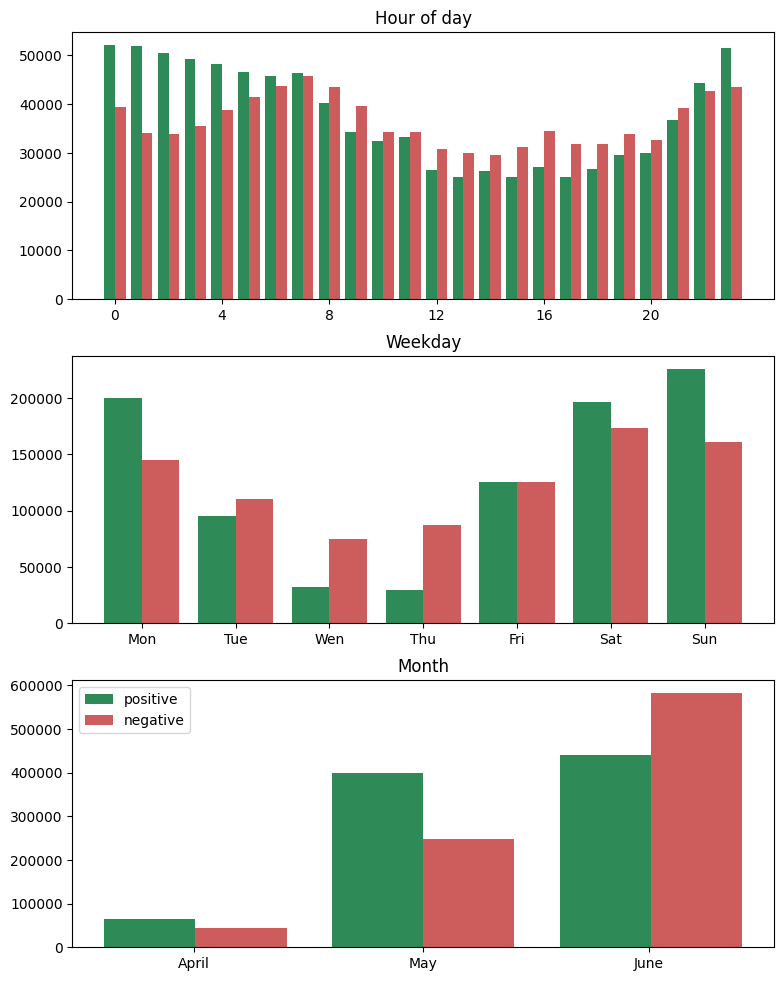

In [19]:
# plt.figure(figsize=(6,12))
fig, axs = plt.subplots(3, figsize=(8,10))

fig.tight_layout(pad=2)
axs[0].hist((merged_df[merged_df['sentiment'] == 1]["hour"], merged_df[merged_df['sentiment'] == 0]["hour"]),  bins=np.arange(25)-0.5, label=['positive', 'negative'], color=['seagreen', 'indianred'])
axs[1].hist((merged_df[merged_df['sentiment'] == 1]["weekday"], merged_df[merged_df['sentiment'] == 0]["weekday"]),  bins=np.arange(8)-0.5, label=['positive', 'negative'], color=['seagreen', 'indianred'])
axs[2].hist((merged_df[merged_df['sentiment'] == 1]["month"], merged_df[merged_df['sentiment'] == 0]["month"]),  bins=3, label=['positive', 'negative'], color=['seagreen', 'indianred'])
# np.arange(4,8)-0.5
axs[0].set_title("Hour of day")
axs[1].set_title("Weekday")
axs[2].set_title("Month")

axs[0].set_xticks(np.arange(0, 23, 4))

axs[1].set_xticklabels(["void", "Mon", "Tue", "Wen", "Thu", "Fri", "Sat", "Sun"])

axs[2].set_xticks([4.33,5,5.66])
axs[2].set_xticklabels(["April", "May", "June"])
axs[2].legend(loc='upper left')    

plt.savefig("dateDistributionHour.svg")

C:\Users\taha_kms\AppData\Local\Temp\ipykernel_6840\2053872652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'sentiment', data = merged_df, #color=['red', 'green'])


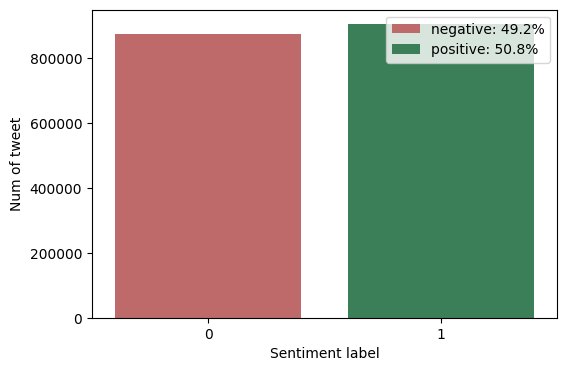

In [30]:

# compute distribution percentages
pos_perc = 100 * merged_df[merged_df['sentiment'] == 1].size / merged_df.size
neg_perc = 100 - pos_perc

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x = 'sentiment', data = merged_df, #color=['red', 'green'])
              palette=sns.color_palette(['indianred', 'seagreen'], 2))
ax.set_ylabel('Num of tweet')
ax.set_xlabel('Sentiment label')
# ax.set_title('Distribution of sentiment')
ax.legend(handles=ax.patches, labels=(f'negative: {neg_perc:.1f}%', f'positive: {pos_perc:.1f}%'))
plt.savefig('DistributionOfSentiment.svg', bbox_inches="tight")
plt.show()

### 2. Data Preprocessing

In [31]:
import re

In [32]:
def preprocess_for_transformers(text):
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove @mentions
    text = re.sub(r'#(\w+)', r'\1', text)  # remove # but keep the word
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # remove non-ASCII
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [33]:
merged_df["clean_text"] = merged_df["text"].astype(str).apply(preprocess_for_transformers)

In [ ]:
merged_df.to_csv("Dataset/merged_output_clean.csv", index=False)